TODO:
try non trainable bert ?
absolute loss?
save/write model
custom loss?
diff architecture?
steal bert calssifier https://www.tensorflow.org/text/tutorials/classify_text_with_bert


# Advanced Deep Learning for NLP - Text based adventure game RL


WIP: Links not assigned yet

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Google Colab stuff

In [1]:
%%capture
!pip install tf-agents
!pip install textworld

from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

Or alternatively (for future, when project not private anymore):

In [ ]:
!git clone https://github.com/

Cloning into 'github.com'...
fatal: repository 'https://github.com/' not found


## Imports

In [2]:
from tests import test_environment_creation
from tf_train_loop import TWTrainer

%load_ext autoreload
%autoreload 2

## Generate games


Only run of necessary.

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/scripts/")

In [ ]:
%%shell
bash ./make_debug_game.sh

Global seed: 2021
Game generated: /content/drive/My Drive/DeepLearningNLP/resources/game_th_lvl2_simple.ulx


In [ ]:
%%capture
%%shell
bash ./make_allgames.sh

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

# Test environment

In [ ]:
test_environment_creation()

# Train

In [4]:
REWARD_DICT = {
    "win_lose_value": 100,
    "max_loop_pun": 0,
    "change_reward": 1,
    "useless_act_pun": 1,
    "verb_in_adm": 1,
}

Try overfitting on one debug game (correct command "take x" will immediately win or lose the game):


step = 25: loss = 2.41e+01, Buff-len = 73
step = 25: Average Return = 204.0
step = 50: loss = 1.17e+01, Buff-len = 153
step = 50: Average Return = 202.0
step = 75: loss = 1.19e+01, Buff-len = 243
step = 75: Average Return = 202.0
step = 100: loss = 6.75e+00, Buff-len = 342
step = 100: Average Return = 202.0
step = 125: loss = 4.29e+00, Buff-len = 395
step = 125: Average Return = 1.0
step = 150: loss = 7.35e+00, Buff-len = 417
step = 150: Average Return = 203.0
step = 175: loss = 6.06e+00, Buff-len = 476
step = 175: Average Return = 202.0
(7,) [ 25  50  75 100 125 150 175]
(7,) [204. 202. 202. 202.   1. 203. 202.]


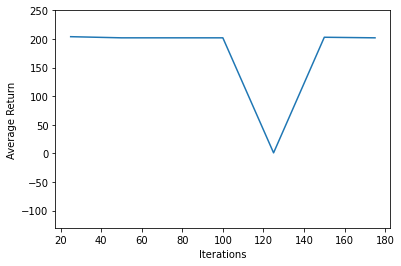

In [8]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 1000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    "batch_size": 128,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 5,
}
trainer = TWTrainer(
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True, 
)
eval_scores = trainer.train(
    num_iterations=1000,
    log_interval=25,
    eval_interval=25,
    game_gen_interval=500,
    plot_avg_ret=True,
)

In [ ]:
pathdir = DEFAULT_PATHS["path_logdir"]
%load_ext tensorboard
%tensorboard --logdir $pathdir


In [9]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 15000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    "batch_size": 128,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 5,
}

trainer = TWTrainer(
    env_dir="train_games_lvl1",
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True, 
)

In [ ]:
eval_scores = trainer.train(
    num_iterations=10000,
    log_interval=50,
    eval_interval=50,
    game_gen_interval=500,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

for lvl in range(3):
  print(f"Changing to next lvl: {lvl + 2} /n")

  trainer.change_env_dir(f"train_games_lvl{lvl + 2}")
  eval_scores = trainer.train(
      num_iterations=10000,
      log_interval=50,
      eval_interval=50,
      game_gen_interval=500,
      continue_training=True,
      rndm_fill_replay=True,
      plot_avg_ret=True,
  )


## Hyper parameter search

In [ ]:
%%capture
!pip install optuna
import optuna

In [ ]:
def objective(trial):
    """"""

    hp_dict = {
      "num_iterations": 2000,
      "learning_rate": trial.suggest_loguniform("lr", 1e-4, 1e-2),
      "initial_collect_steps": 10000,
      "collect_steps_per_iteration": 1,
      "replay_buffer_max_length": 100000,
      "batch_size": trial.suggest_int("batch_size", 16, 256),
      "log_interval": 500,
      "num_eval_episodes": 1,
      "eval_interval": 100,
    }

    REWARD_DICT = {
        "win_lose_value": 100,
        "max_loop_pun": 1,
        "change_reward": 1,
        "useless_act_pun": 1,
        "verb_in_adm": 1,
    }

    eval_scores = train.main(plot_avg_ret=True, debug=False, reward_dict=REWARD_DICT, **hp_dict)
    # eval_scores = np.delete(eval_scores, 0)

    return max(eval_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
print(study.best_trial)

In [ ]:
print(study.best_trial)

FrozenTrial(number=0, values=[203.0], datetime_start=datetime.datetime(2021, 7, 30, 11, 46, 26, 924586), datetime_complete=datetime.datetime(2021, 7, 30, 11, 50, 2, 140224), params={'lr': 0.004015582546958087, 'batch_size': 89}, distributions={'lr': LogUniformDistribution(high=0.01, low=0.0001), 'batch_size': IntUniformDistribution(high=256, low=16, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
